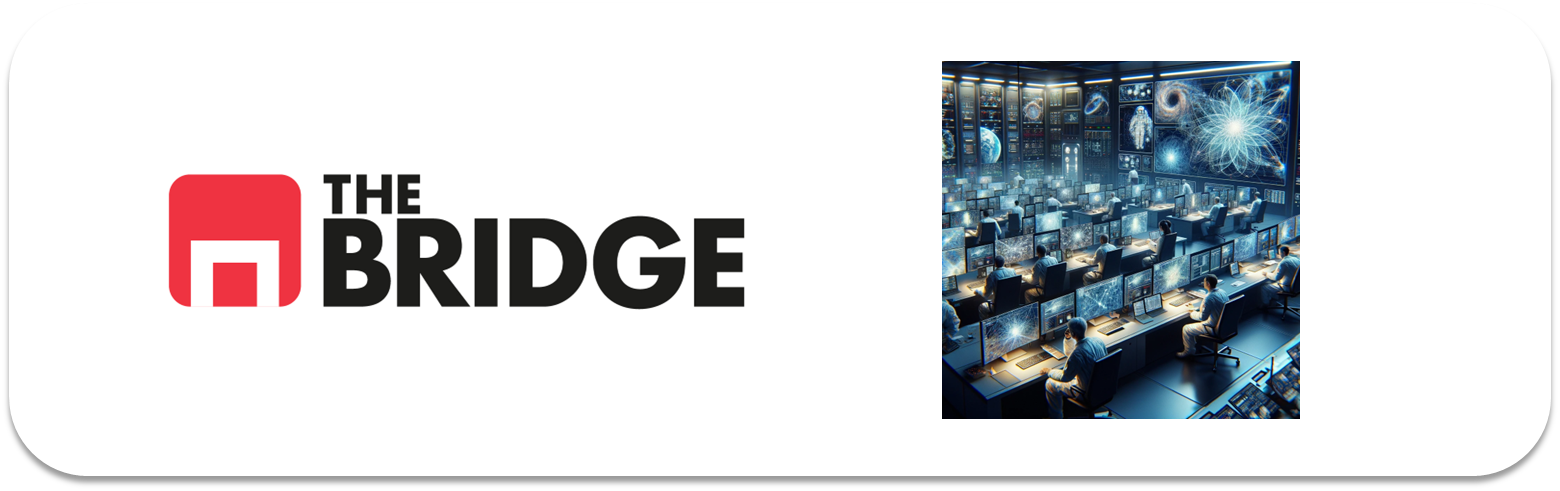

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [45]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from skimage.io import imread
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix
import cv2

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.

In [46]:
def read_data(directorios, reshape_dim = (32,32)):
    X = [] 
    y = []
    mapa_imagen_fichero = []
    directorios = directorios if isinstance(directorios, list) else [directorios] if isinstance(directorios, str) else []
    for directorio in directorios:
        for file in os.listdir(directorio):
            image = imread('/'.join([directorio, file]))
            image = cv2.resize(image, reshape_dim)
            X.append(image)
            y.append(file.split('.')[0])
            mapa_imagen_fichero.append(file)
    
    return np.array(X), np.array(y), mapa_imagen_fichero

In [47]:
path_data = "./data/"
directorios = [f"{path_data}github_train_{i}" for i in range(0,4)]
x_train, y_train, test_map = read_data(directorios)

In [48]:
x_train.shape

(4000, 32, 32, 3)

Los datos de train contienen un total de 4000 imágenes de 32 x 32 píxeles de a color (3 canales)

In [49]:
directorios = [path_data + "github_test"]
x_test, y_test, test_map = read_data(directorios)

In [50]:
pd.Series(y_train).value_counts(True)

cat    0.5
dog    0.5
Name: proportion, dtype: float64

Tiene una distribución perfecta

In [51]:
y_train = pd.Series(y_train).map({'cat': 0, 'dog': 1})
y_test = pd.Series(y_test).map({'cat': 0, 'dog': 1})

# Normalización de las imágenes
x_train = x_train / 255
x_test = x_test / 255

# Barajar los datos para que no estén ordenados
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_test, y_test = shuffle(x_test, y_test, random_state=42)

In [52]:
# Creación del modelo
model = keras.Sequential()

model.add(keras.layers.Input(shape = (32, 32, 3)))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same',
                              activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(filters = 15, kernel_size = (5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units = 256, activation ='relu'))

model.add(keras.layers.Dense(units = 256, activation ='relu'))

model.add(keras.layers.Dense(units = 1, activation ='sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 15)     │        24,015 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 540)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       138,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,352 (899.81 KB)

 Trainable params: 230,352 (899.81 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 100, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5401 - loss: 0.6903 - val_accuracy: 0.6187 - val_loss: 0.6643
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6087 - loss: 0.6518 - val_accuracy: 0.6425 - val_loss: 0.6313
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6465 - loss: 0.6148 - val_accuracy: 0.6338 - val_loss: 0.6287
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6983 - loss: 0.5793 - val_accuracy: 0.6675 - val_loss: 0.6060
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6925 - loss: 0.5747 - val_accuracy: 0.6513 - val_loss: 0.6174
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6995 - loss: 0.5704 - val_accuracy: 0.6775 - val_loss: 0.5903
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7251 - loss: 0.5473 - val_accuracy: 0.6862 - val_loss: 0.5888
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7412 - loss: 0.5223 - 

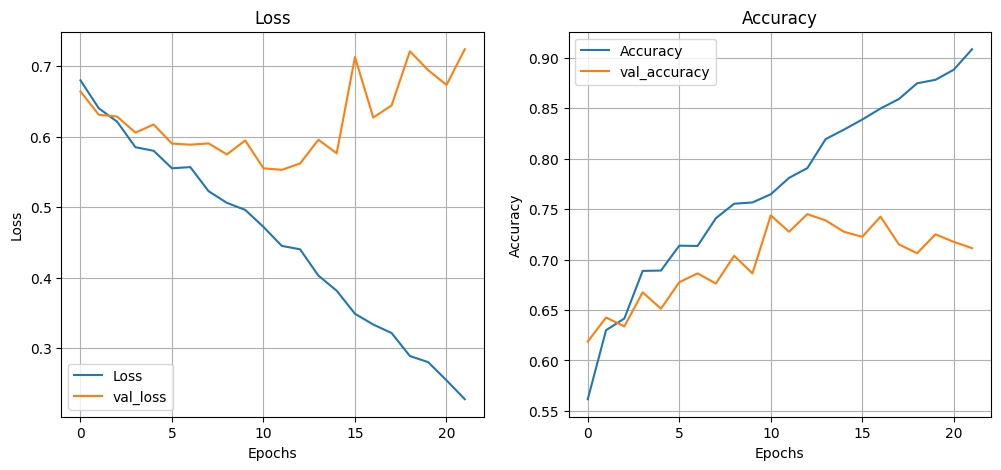

In [56]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       500
           1       0.74      0.67      0.70       500

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



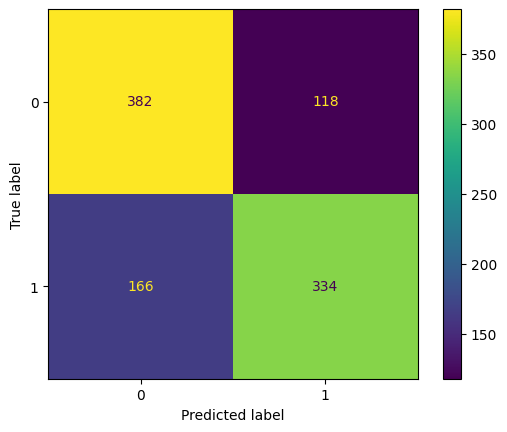

In [58]:
predictions = model.predict(x_test)
y_pred = (predictions > 0.5).astype("int32")

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

El modelo predice bien pero hay algunos imágenes que las confunde. Hay un total de 118 imágenes que las predice como perro que en realidad son gatos y un total de 166 imágenes que predices como gato que son realmente perros.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.

In [ ]:
y_probs = predictions.ravel()
y_true = y_test

errors = np.abs(y_probs - y_true)
indices_mayor_error = np.argsort(errors)[-10:][::-1]  # Top 10 errores

for i in indices_mayor_error:
    print(f"Índice: {i}")
    print(f"Probabilidad predicha: {y_probs[i]:.3f}")
    print(f"Etiqueta real: {y_true[i]}")
    print(f"Error: {errors[i]:.3f}")
    print("------")


Índice: 982
Probabilidad predicha: 0.000
Etiqueta real: 1
Error: 0.363
------
Índice: 144
Probabilidad predicha: 0.000
Etiqueta real: 0
Error: 0.466
------
Índice: 873
Probabilidad predicha: 0.000
Etiqueta real: 1
Error: 0.813
------
Índice: 889
Probabilidad predicha: 1.000
Etiqueta real: 1
Error: 0.001
------
Índice: 586
Probabilidad predicha: 0.001
Etiqueta real: 1
Error: 0.152
------
Índice: 948
Probabilidad predicha: 0.998
Etiqueta real: 1
Error: 0.319
------
Índice: 826
Probabilidad predicha: 0.003
Etiqueta real: 1
Error: 0.758
------
Índice: 859
Probabilidad predicha: 0.003
Etiqueta real: 1
Error: 0.011
------
Índice: 554
Probabilidad predicha: 0.003
Etiqueta real: 1
Error: 0.000
------
Índice: 500
Probabilidad predicha: 0.003
Etiqueta real: 1
Error: 0.489
------


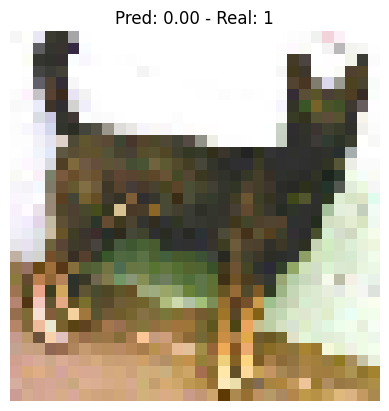

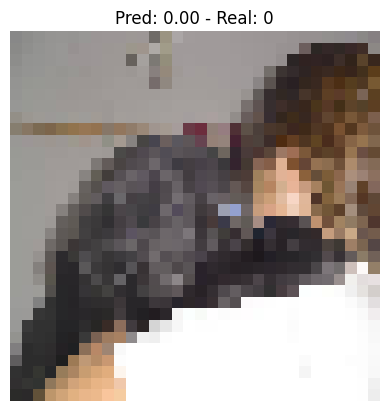

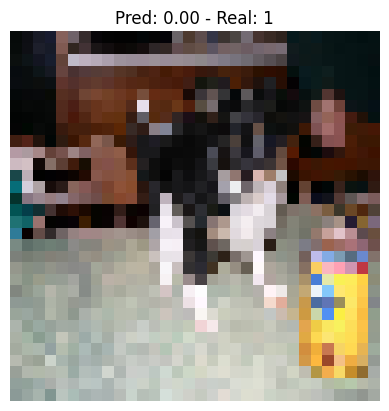

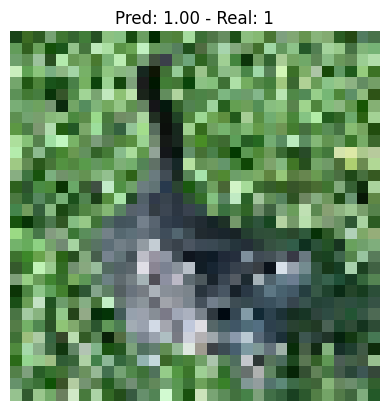

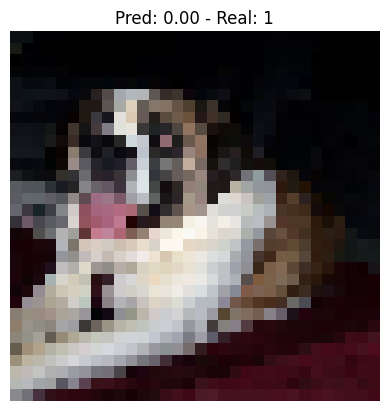

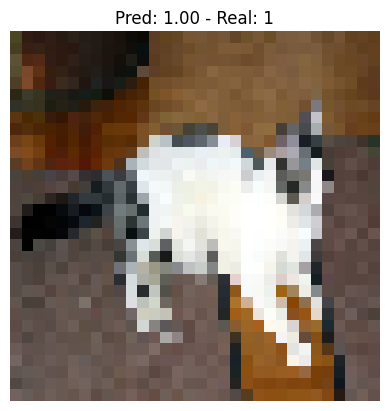

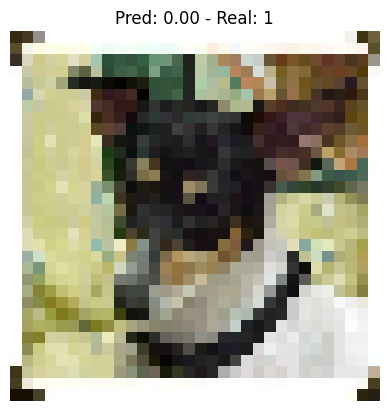

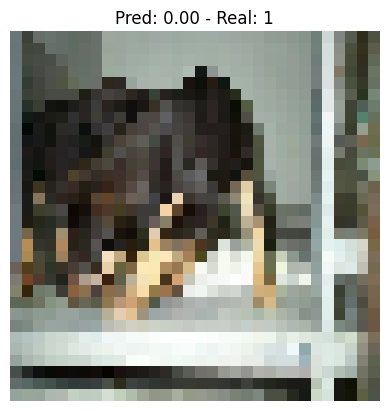

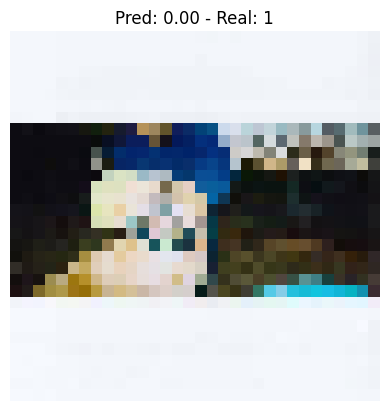

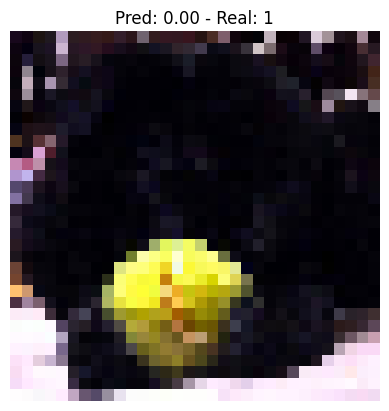

In [76]:
for i in indices_mayor_error:
    plt.imshow(x_test[i])
    plt.title(f"Pred: {y_probs[i]:.2f} - Real: {y_true[i]}")
    plt.axis("off")
    plt.show()


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 